<a href="https://colab.research.google.com/github/ashraful005/DS_ML_Bootcamp/blob/master/Fish_Disease_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Install packages**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%%capture
!pip install torchmetrics
!pip install torchinfo

# **2. Import libraries**

In [3]:
# Data handling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Preprocessing
import cv2
from sklearn.model_selection import train_test_split as tts

# Torch
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from torchinfo import summary
from torchmetrics.classification import MulticlassAccuracy
from torchvision.models import resnet50, ResNet50_Weights

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# os
import os

# Path
from pathlib import Path

# tqdm
from tqdm.auto import tqdm

# typing
from typing import Dict, List

# Counter
from collections import Counter

# random
import random

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"ashraful005","key":"4f746c27dab22414e17a0f5a0fe3baca"}'}

In [5]:
!pip install kaggle

In [6]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [7]:
!cp kaggle.json ~/.kaggle

In [8]:
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
pip install --upgrade kaggle


In [10]:
!chmod 600 ~/.kaggle/kaggle.json

In [11]:
!kaggle datasets list

ref                                                         title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
hummaamqaasim/jobs-in-data                                  Jobs and Salaries in Data Science                76KB  2023-12-25 20:03:32          10756        208  1.0              
nelgiriyewithana/apple-quality                              Apple Quality                                   170KB  2024-01-11 14:31:07           4152        102  1.0              
joebeachcapital/57651-spotify-songs                         57,650 Spotify Songs                             21MB  2024-01-23 06:48:36            993         33  1.0              
sahilwagh/gold-stock-prices                                 Gold Stock Prices                       

In [12]:
!kaggle datasets download 'subirbiswas19/freshwater-fish-disease-aquaculture-in-south-asia'

freshwater-fish-disease-aquaculture-in-south-asia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [13]:
!unzip freshwater-fish-disease-aquaculture-in-south-asia.zip

Archive:  freshwater-fish-disease-aquaculture-in-south-asia.zip
replace SB-Fish-Disease.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: SB-Fish-Disease.csv     
replace SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (1).jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (1).jpeg  
  inflating: SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (1).jpg  
  inflating: SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (1).png  
  inflating: SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (10).jpg  
  inflating: SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (11).jpg  
  inflating: SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (12).jpg  
  inflating: SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (13).jpg  
  inflating: 

In [14]:
import pandas as pd

In [15]:
df=pd.read_csv('SB-Fish-Disease.csv')

In [16]:
df

,Folder Name,Image Filename,Image Path
0,Bacterial diseases - Aeromoniasis,Bacterial diseases - Aeromoniasis (1).jpeg,SB-FishDisease\Bacterial diseases - Aeromonias...
1,Bacterial diseases - Aeromoniasis,Bacterial diseases - Aeromoniasis (1).jpg,SB-FishDisease\Bacterial diseases - Aeromonias...
2,Bacterial diseases - Aeromoniasis,Bacterial diseases - Aeromoniasis (1).png,SB-FishDisease\Bacterial diseases - Aeromonias...
3,Bacterial diseases - Aeromoniasis,Bacterial diseases - Aeromoniasis (10).jpg,SB-FishDisease\Bacterial diseases - Aeromonias...
4,Bacterial diseases - Aeromoniasis,Bacterial diseases - Aeromoniasis (11).jpg,SB-FishDisease\Bacterial diseases - Aeromonias...
...,...,...,...
513,Viral diseases White tail disease,Viral diseases White tail disease (7).jpg,SB-FishDisease\Viral diseases White tail disea...
514,Viral diseases White tail disease,Viral diseases White tail disease (8).jpeg,SB-FishDisease\Viral diseases White tail disea...
515,Viral diseases White tail disease,Viral diseases White tail disease (8).jpg,SB-FishDisease\Viral diseases White tail disea...
516,Viral diseases White tail disease,Viral diseases White tail disease (9).jpeg,SB-FishDisease\Viral diseases White tail disea...


# **3. Load data and EDA**

In [17]:
# Let's see how many images we have.
from pathlib import Path
IMAGE_PATH = Path("/content/SB-FishDisease/SB-FishDisease")

image_path_list_jpg = list(IMAGE_PATH.glob("*/*.jpg"))
image_path_list_jpeg = list(IMAGE_PATH.glob("*/*.jpeg"))
image_path_list_png = list(IMAGE_PATH.glob("*/*.png"))
image_path_list_JPG = list(IMAGE_PATH.glob("*/*.JPG"))
image_path_list_webp = list(IMAGE_PATH.glob("*/*.webp"))

TOTAL_IMAGE_PATH_LIST = image_path_list_jpg + image_path_list_jpeg + image_path_list_png\
                        + image_path_list_JPG + image_path_list_webp

print(f'Total Images = {len(TOTAL_IMAGE_PATH_LIST)}')

Total Images = 460


In [18]:
# Let's visualize how many classes we have.
import os
classes = sorted(os.listdir(IMAGE_PATH))
classes

['Bacterial Red disease',
 'Bacterial diseases - Aeromoniasis',
 'Bacterial gill disease',
 'Fungal diseases Saprolegniasis',
 'Healthy Fish',
 'Parasitic diseases',
 'Viral diseases White tail disease']

In [19]:
# Let's see how many images per class we have.
from collections import Counter
class_count = []
for i in TOTAL_IMAGE_PATH_LIST:
    class_count.append(i.parent.stem)

Counter(class_count)

Counter({'Viral diseases White tail disease': 44,
         'Bacterial diseases - Aeromoniasis': 49,
         'Parasitic diseases': 38,
         'Bacterial Red disease': 48,
         'Healthy Fish': 177,
         'Bacterial gill disease': 58,
         'Fungal diseases Saprolegniasis': 46})

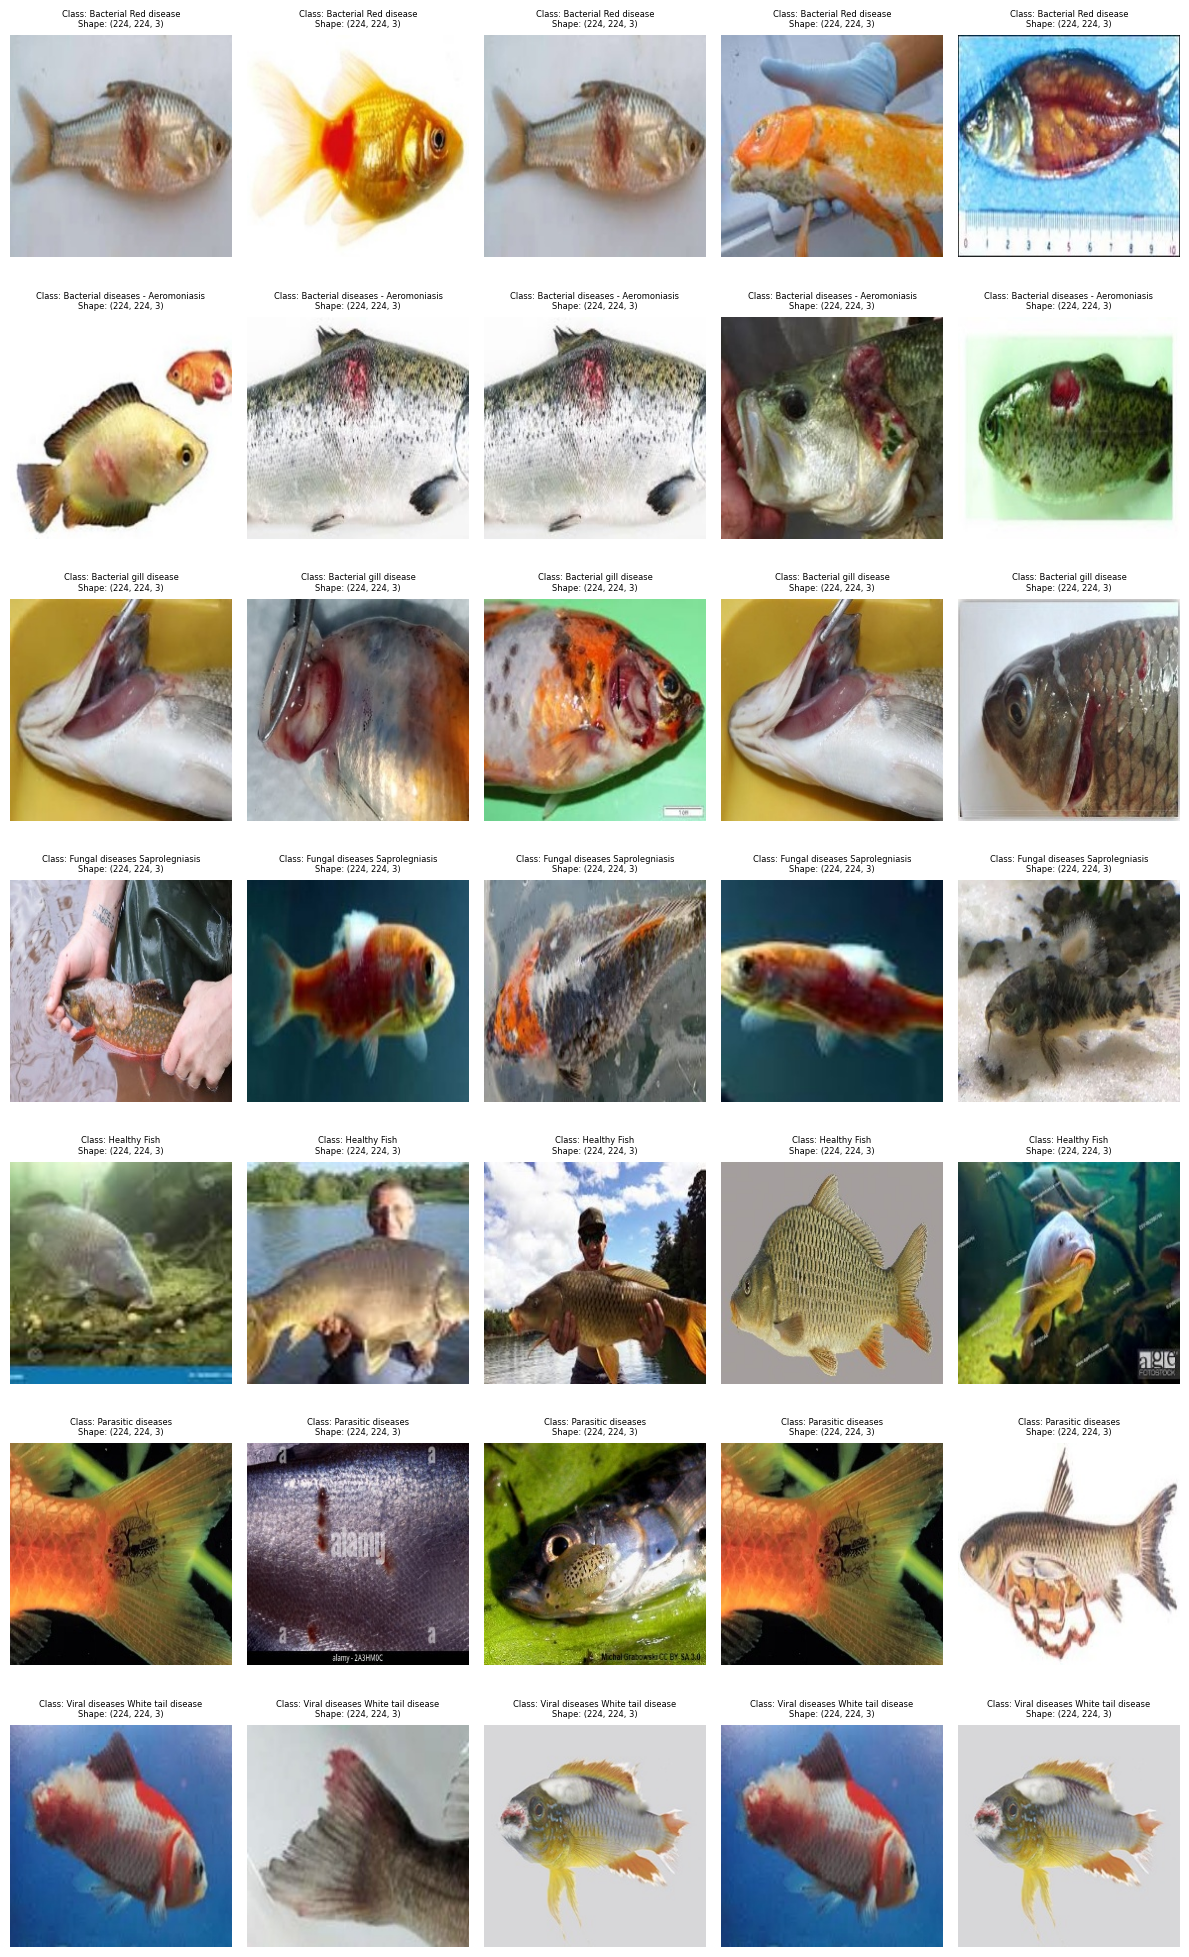

In [20]:
# Let's visualize 5 images for each class.
import matplotlib.pyplot as plt
import random
import cv2

fig,ax = plt.subplots(nrows = 7, ncols = 5, figsize = (12,20))
p = 0
for c in classes:

    a = random.choices(list(Path(os.path.join(IMAGE_PATH, c)).glob("*.jpg")), k = 5)

    for i,j in enumerate(a):
        img_BGR = cv2.imread(str(j))
        img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)
        ax[p,i].imshow(img_RGB)
        ax[p,i].set_title(f'Class: {j.parent.stem}\nShape: {img_RGB.shape}', fontsize = 6)
        ax[p,i].axis('off')
    p += 1

fig.tight_layout()
fig.show()

**We see that the images have different sizes, so we will proceed to see how the width and height of the images are distributed.**

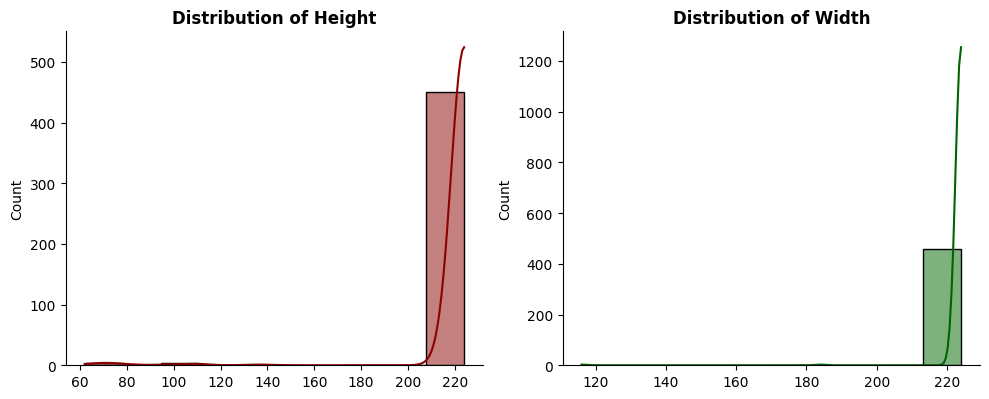

In [21]:
seq_height = []
seq_width = []

for i in TOTAL_IMAGE_PATH_LIST:
    img_BGR = cv2.imread(str(i))
    img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)
    seq_height.append(img_RGB.shape[0])
    seq_width.append(img_RGB.shape[1])

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4.1))
ax = ax.flat

sns.histplot(seq_height, kde = True, color = 'darkred', ax = ax[0])
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].set_title('Distribution of Height', fontweight = 'bold', color = 'black')

sns.histplot(seq_width, kde = True, color = 'darkgreen', ax = ax[1])
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].set_title('Distribution of Width', fontweight = 'bold', color = 'black')

fig.tight_layout()
fig.show()

In [22]:
df_height_width = pd.DataFrame({'height':seq_height, 'width':seq_width})

df_height_width.describe().T

,count,mean,std,min,25%,50%,75%,max
height,460.0,221.345652,18.914556,62.0,224.0,224.0,224.0,224.0
width,460.0,223.678261,5.365991,116.0,224.0,224.0,224.0,224.0


# **4. Preprocessing**

In [23]:
# Let's create our pd.DataFrame to store the path of the images and their respective label.
img_path_and_label = {'img_path':[],
                      'label':[]}

for img_pth in TOTAL_IMAGE_PATH_LIST:
    img_path_and_label['img_path'].append(img_pth)
    img_path_and_label['label'].append(img_pth.parent.stem)

df_path_and_label = pd.DataFrame(img_path_and_label)
df_path_and_label.head()

,img_path,label
0,/content/SB-FishDisease/SB-FishDisease/Viral d...,Viral diseases White tail disease
1,/content/SB-FishDisease/SB-FishDisease/Viral d...,Viral diseases White tail disease
2,/content/SB-FishDisease/SB-FishDisease/Viral d...,Viral diseases White tail disease
3,/content/SB-FishDisease/SB-FishDisease/Viral d...,Viral diseases White tail disease
4,/content/SB-FishDisease/SB-FishDisease/Viral d...,Viral diseases White tail disease


In [24]:
# Now we are going to separate the paths of the images and their respective label.
X = df_path_and_label.drop('label', axis = 1)
y = df_path_and_label['label']

# Then, let's split into training and test set.
# But first we define the random seed for reproducibility.
SEED = 42

X_train, X_test, y_train, y_test = tts(X,y, test_size = 0.2, random_state = SEED, stratify = y)

In [25]:
print('Total Images of training set:')
print(Counter(y_train))
print('')

print('Total Images of test set:')
print(Counter(y_test))

Total Images of training set:
Counter({'Healthy Fish': 142, 'Bacterial gill disease': 46, 'Bacterial diseases - Aeromoniasis': 39, 'Bacterial Red disease': 39, 'Fungal diseases Saprolegniasis': 37, 'Viral diseases White tail disease': 35, 'Parasitic diseases': 30})

Total Images of test set:
Counter({'Healthy Fish': 35, 'Bacterial gill disease': 12, 'Bacterial diseases - Aeromoniasis': 10, 'Viral diseases White tail disease': 9, 'Fungal diseases Saprolegniasis': 9, 'Bacterial Red disease': 9, 'Parasitic diseases': 8})


In [26]:
classes

['Bacterial Red disease',
 'Bacterial diseases - Aeromoniasis',
 'Bacterial gill disease',
 'Fungal diseases Saprolegniasis',
 'Healthy Fish',
 'Parasitic diseases',
 'Viral diseases White tail disease']

In [27]:
# Now we have to convert our labels to number, where:
# Bacterial Red disease = 0
# Bacterial diseases - Aeromoniasis = 1
# Bacterial gill disease = 2
# Fungal diseases Saprolegniasis = 3
# Healthy Fish = 4
# Parasitic diseases = 5
# Viral diseases White tail disease = 6

label_map = dict(zip(classes, range(0,7)))

y_train_array = np.array(y_train.map(label_map))
y_train_torch = torch.from_numpy(y_train_array)

y_test_array = np.array(y_test.map(label_map))
y_test_torch = torch.from_numpy(y_test_array)
y_test_torch

tensor([4, 1, 2, 5, 4, 4, 1, 5, 6, 3, 4, 3, 4, 4, 0, 1, 4, 3, 6, 5, 0, 4, 3, 0,
        2, 2, 1, 5, 4, 6, 2, 6, 4, 1, 1, 4, 3, 2, 4, 4, 3, 1, 4, 4, 0, 0, 4, 4,
        5, 0, 2, 4, 2, 2, 4, 1, 6, 4, 4, 1, 4, 4, 3, 5, 0, 6, 3, 4, 6, 4, 4, 4,
        4, 2, 4, 2, 4, 5, 4, 3, 4, 1, 6, 0, 4, 6, 2, 4, 4, 5, 0, 2])

In [28]:
# We define the transformations for our data set.
weights = ResNet50_Weights.DEFAULT
auto_transforms = weights.transforms()
auto_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[232]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [29]:
# We apply the transformations to our data sets.

images_train = [None] * len(X_train)

for i, (_,img_path_train) in enumerate(X_train.iterrows()):
    img_train = Image.open(img_path_train[0]).convert('RGB')
    images_train[i] = auto_transforms(img_train)

images_test = [None] * len(X_test)

for i, (_, img_path_test) in enumerate(X_test.iterrows()):
    img_test = Image.open(img_path_test[0]).convert('RGB')
    images_test[i] = auto_transforms(img_test)

In [30]:
# We will then convert our lists of tensors into a single tensor.
X_train_torch = torch.stack(images_train)
X_test_torch = torch.stack(images_test)

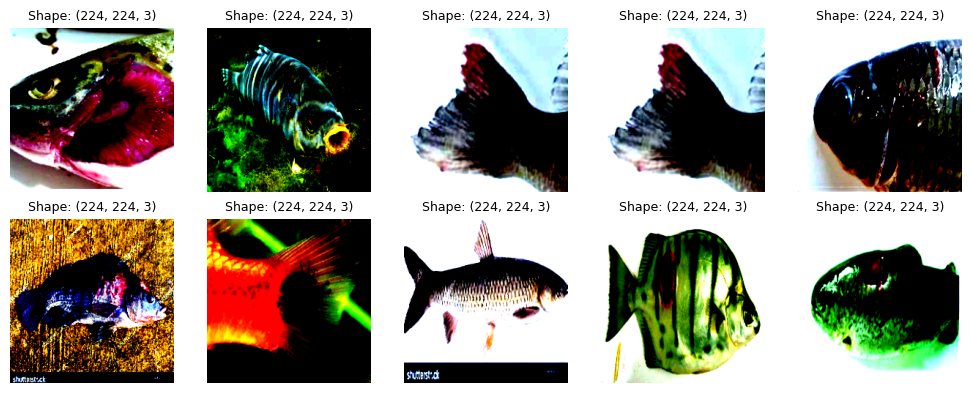

In [31]:
# Let's visualize some randomly selected transformed images.
indices = torch.randperm(10).numpy()

fig, ax = plt.subplots(nrows = 2, ncols = 5, figsize = (10,4))
ax = ax.flat

for i,j in enumerate(indices):
    IMG = X_train_torch[j].permute(1,2,0).numpy()
    ax[i].imshow(IMG)
    ax[i].set_title(f'Shape: {IMG.shape}', fontsize = 9)
    ax[i].axis('off')

fig.tight_layout()
fig.show()

**Now we have to convert our tensors into Datase's and then convert it into DataLoader's.**

In [32]:
# First of all, we convert to Dataset but for this we have to create a Dataset class.
class CustomDataset(Dataset):
    def __init__(self, data, target):
        self.data = data
        self.target = target

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        x = self.data[idx]
        y = self.target[idx]

        return x,y

In [33]:
# Now we convert to Dataset.
train_dataset = CustomDataset(X_train_torch, y_train_torch)
test_dataset = CustomDataset(X_test_torch, y_test_torch)

In [34]:
# Then we convert to DataLoader.
BATCH_SIZE = 4
NUM_WORKERS = os.cpu_count()

train_dataloader = DataLoader(dataset = train_dataset,
                              batch_size = BATCH_SIZE,
                              shuffle = True,
                              num_workers = NUM_WORKERS)

test_dataloader = DataLoader(dataset = test_dataset,
                             batch_size = BATCH_SIZE,
                             shuffle = False,
                             num_workers = NUM_WORKERS)

In [35]:
# Let's visualize a batch.
images_batch, labels_batch = next(iter(train_dataloader))

images_batch.shape, labels_batch.shape

(torch.Size([4, 3, 224, 224]), torch.Size([4]))

# **5. Model**

In [36]:
# GPU
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [37]:
# We define the model to use.
model = resnet50(weights = weights)

In [38]:
# Now we visualize the architecture of the model.
summary(model = model,
        input_size = [4,3,224,224],
        col_names = ['input_size','output_size','num_params','trainable'],
        col_width = 17,
        row_settings = ['var_names'])

Layer (type (var_name))                  Input Shape       Output Shape      Param #           Trainable
ResNet (ResNet)                          [4, 3, 224, 224]  [4, 1000]         --                True
├─Conv2d (conv1)                         [4, 3, 224, 224]  [4, 64, 112, 112] 9,408             True
├─BatchNorm2d (bn1)                      [4, 64, 112, 112] [4, 64, 112, 112] 128               True
├─ReLU (relu)                            [4, 64, 112, 112] [4, 64, 112, 112] --                --
├─MaxPool2d (maxpool)                    [4, 64, 112, 112] [4, 64, 56, 56]   --                --
├─Sequential (layer1)                    [4, 64, 56, 56]   [4, 256, 56, 56]  --                True
│    └─Bottleneck (0)                    [4, 64, 56, 56]   [4, 256, 56, 56]  --                True
│    │    └─Conv2d (conv1)               [4, 64, 56, 56]   [4, 64, 56, 56]   4,096             True
│    │    └─BatchNorm2d (bn1)            [4, 64, 56, 56]   [4, 64, 56, 56]   128               True

In [39]:
# Now we freeze the parameters of the extractor layers.
for param in model.parameters():
    param.requires_grad = False

In [40]:
# We go back to visualize how it looked after freezing the parameters.
# Now we visualize the architecture of the model.
summary(model = model,
        input_size = [4,3,224,224],
        col_names = ['input_size','output_size','num_params','trainable'],
        col_width = 17,
        row_settings = ['var_names'])


Layer (type (var_name))                  Input Shape       Output Shape      Param #           Trainable
ResNet (ResNet)                          [4, 3, 224, 224]  [4, 1000]         --                False
├─Conv2d (conv1)                         [4, 3, 224, 224]  [4, 64, 112, 112] (9,408)           False
├─BatchNorm2d (bn1)                      [4, 64, 112, 112] [4, 64, 112, 112] (128)             False
├─ReLU (relu)                            [4, 64, 112, 112] [4, 64, 112, 112] --                --
├─MaxPool2d (maxpool)                    [4, 64, 112, 112] [4, 64, 56, 56]   --                --
├─Sequential (layer1)                    [4, 64, 56, 56]   [4, 256, 56, 56]  --                False
│    └─Bottleneck (0)                    [4, 64, 56, 56]   [4, 256, 56, 56]  --                False
│    │    └─Conv2d (conv1)               [4, 64, 56, 56]   [4, 64, 56, 56]   (4,096)           False
│    │    └─BatchNorm2d (bn1)            [4, 64, 56, 56]   [4, 64, 56, 56]   (128)           

In [41]:
# Let's visualize the last layer, which we will modify for our binary classification purpose.
model.fc

Linear(in_features=2048, out_features=1000, bias=True)

In [42]:
# We modify the last layer.
output_shape = len(classes)

model.fc = nn.Linear(in_features = 2048, out_features = output_shape, bias = True)

In [43]:
# We visualize our model again.
summary(model = model,
        input_size = [4,3,224,224],
        col_names = ['input_size','output_size','num_params','trainable'],
        col_width = 17,
        row_settings = ['var_names'])

Layer (type (var_name))                  Input Shape       Output Shape      Param #           Trainable
ResNet (ResNet)                          [4, 3, 224, 224]  [4, 7]            --                Partial
├─Conv2d (conv1)                         [4, 3, 224, 224]  [4, 64, 112, 112] (9,408)           False
├─BatchNorm2d (bn1)                      [4, 64, 112, 112] [4, 64, 112, 112] (128)             False
├─ReLU (relu)                            [4, 64, 112, 112] [4, 64, 112, 112] --                --
├─MaxPool2d (maxpool)                    [4, 64, 112, 112] [4, 64, 56, 56]   --                --
├─Sequential (layer1)                    [4, 64, 56, 56]   [4, 256, 56, 56]  --                False
│    └─Bottleneck (0)                    [4, 64, 56, 56]   [4, 256, 56, 56]  --                False
│    │    └─Conv2d (conv1)               [4, 64, 56, 56]   [4, 64, 56, 56]   (4,096)           False
│    │    └─BatchNorm2d (bn1)            [4, 64, 56, 56]   [4, 64, 56, 56]   (128)         

In [44]:
# Now let's visualize one step forward.

pred_logit = model(images_batch.to(device))
pred_logit

tensor([[-0.0287, -0.1090, -0.1279, -0.0543, -0.0519, -0.1069, -0.0382],
        [-0.1127,  0.0226,  0.0031, -0.0223,  0.2279,  0.0376,  0.1396],
        [-0.0808,  0.0248, -0.0935, -0.1107,  0.2028, -0.0418, -0.0378],
        [-0.0072,  0.1122,  0.0989,  0.0050, -0.0805, -0.0199, -0.0239]],
       grad_fn=<AddmmBackward0>)

In [45]:
# Let's define our loss function and the optimizer.
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr = 0.01, weight_decay = 0.1)

**We are going to define 3 functions to execute the training**:

- train_step
- checkpoint
- test_step
- train

In [46]:

def train_step(model:torch.nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer):


    model.train()

    train_loss = 0.
    accuracy_train = MulticlassAccuracy(num_classes = len(classes), average = 'macro').to(device)

    for batch,(X,y) in enumerate(dataloader):
        X,y = X.to(device), y.to(device)
        y_pred_logit = model(X)

        loss = loss_fn(y_pred_logit, y)
        train_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        y_pred_prob = torch.softmax(y_pred_logit, dim = 1)
        accuracy_train.update(y_pred_prob, y)

    train_loss = train_loss/len(dataloader)
    train_accuracy = accuracy_train.compute()
    accuracy_train.reset()

    return train_loss, train_accuracy

In [47]:
def save_checkpoint(filename, model, loss, epoch, optimizer):
    state = {'filename':filename,
             'model':model.state_dict(),
             'loss':loss,
             'epoch':epoch,
             'optimizer':optimizer.state_dict()}

    torch.save(state, filename)

In [48]:
def test_step(model:torch.nn.Module,
              dataloader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module):


    model.eval()

    test_loss = 0.
    accuracy_test = MulticlassAccuracy(num_classes = len(classes), average = 'macro').to(device)

    with torch.inference_mode():
        for batch,(X,y) in enumerate(dataloader):
            X,y = X.to(device), y.to(device)
            y_pred_logit = model(X)

            loss = loss_fn(y_pred_logit, y)
            test_loss += loss.item()

            y_pred_prob = torch.softmax(y_pred_logit, dim = 1)
            accuracy_test.update(y_pred_prob, y)

    test_loss = test_loss/len(dataloader)
    test_accuracy = accuracy_test.compute()
    accuracy_test.reset()

    return test_loss, test_accuracy

In [49]:
def train(model:torch.nn.Module,
          train_dataloader:torch.utils.data.DataLoader,
          test_dataloader:torch.utils.data.DataLoader,
          loss_fn:torch.nn.Module,
          optimizer:torch.optim.Optimizer,
          epochs:int):

    results = {'train_loss':[],
               'train_accuracy':[],
               'test_loss':[],
               'test_accuracy':[]}

    best_test_loss = float('inf')

    for epoch in tqdm(range(epochs)):
        train_loss, train_accuracy = train_step(model = model,
                                        dataloader = train_dataloader,
                                        loss_fn = loss_fn,
                                        optimizer = optimizer)


        test_loss, test_accuracy = test_step(model = model,
                                     dataloader = test_dataloader,
                                     loss_fn = loss_fn)

        if test_loss < best_test_loss:
            best_test_loss = test_loss

            file_name = 'best_model.pt'

            save_checkpoint(file_name, model, best_test_loss, epoch, optimizer)

        print(f'Epoch: {epoch + 1} | ',
              f'Train Loss: {train_loss:.4f} | ',
              f'Train Accuracy: {train_accuracy:.4f} | ',
              f'Test Loss: {test_loss:.4f} | ',
              f'Test Accuracy: {test_accuracy:.4f}')

        results['train_loss'].append(train_loss)
        results['train_accuracy'].append(train_accuracy)
        results['test_loss'].append(test_loss)
        results['test_accuracy'].append(test_accuracy)

    return results

In [50]:
# Training !!

torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)

EPOCHS = 100

MODEL_RESULTS = train(model.to(device),
                      train_dataloader,
                      test_dataloader,
                      loss_fn,
                      optimizer,
                      EPOCHS)

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 |  Train Loss: 1.8309 |  Train Accuracy: 0.3135 |  Test Loss: 1.0454 |  Test Accuracy: 0.4855
Epoch: 2 |  Train Loss: 0.9578 |  Train Accuracy: 0.6141 |  Test Loss: 0.8780 |  Test Accuracy: 0.6374
Epoch: 3 |  Train Loss: 0.6824 |  Train Accuracy: 0.7080 |  Test Loss: 0.8481 |  Test Accuracy: 0.6217
Epoch: 4 |  Train Loss: 0.5722 |  Train Accuracy: 0.7938 |  Test Loss: 1.8718 |  Test Accuracy: 0.6123
Epoch: 5 |  Train Loss: 0.4487 |  Train Accuracy: 0.8009 |  Test Loss: 2.6266 |  Test Accuracy: 0.6895
Epoch: 6 |  Train Loss: 0.3952 |  Train Accuracy: 0.8225 |  Test Loss: 1.1960 |  Test Accuracy: 0.6667
Epoch: 7 |  Train Loss: 0.5155 |  Train Accuracy: 0.7813 |  Test Loss: 0.7577 |  Test Accuracy: 0.7133
Epoch: 8 |  Train Loss: 0.3843 |  Train Accuracy: 0.8666 |  Test Loss: 1.3410 |  Test Accuracy: 0.6232
Epoch: 9 |  Train Loss: 0.4571 |  Train Accuracy: 0.8418 |  Test Loss: 1.1653 |  Test Accuracy: 0.6649
Epoch: 10 |  Train Loss: 0.4202 |  Train Accuracy: 0.8439 |  Test Loss: 2

In [51]:
# Function to plot the loss and metric during each training epoch.
def plot_loss_metric_curve(model_results:Dict[str,List[float]]):

    train_loss = model_results["train_loss"]
    test_loss = model_results["test_loss"]

    train_accuracy = [float(value) for value in model_results["train_accuracy"]]
    test_accuracy = [float(value) for value in model_results["test_accuracy"]]

    fig,axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))
    plt.style.use("ggplot")
    axes = axes.flat

    axes[0].plot(train_loss, color = "red", label = "Train")
    axes[0].plot(test_loss, color = "blue", label = "Test")
    axes[0].set_title("CrossEntropyLoss", fontsize = 12, fontweight = "bold", color = "black")
    axes[0].set_xlabel("Epochs", fontsize = 10, fontweight = "bold", color = "black")
    axes[0].set_ylabel("Loss", fontsize = 10, fontweight = "bold", color = "black")
    axes[0].legend()

    axes[1].plot(train_accuracy, color = "red", label = "Train")
    axes[1].plot(test_accuracy, color = "blue", label = "Test")
    axes[1].set_title("Metric of performance: Accuracy", fontsize = 12, fontweight = "bold", color = "black")
    axes[1].set_xlabel("Epochs", fontsize = 10, fontweight = "bold", color = "black")
    axes[1].set_ylabel("Score", fontsize = 10, fontweight = "bold", color = "black")
    axes[1].legend()

    fig.tight_layout()
    fig.show()

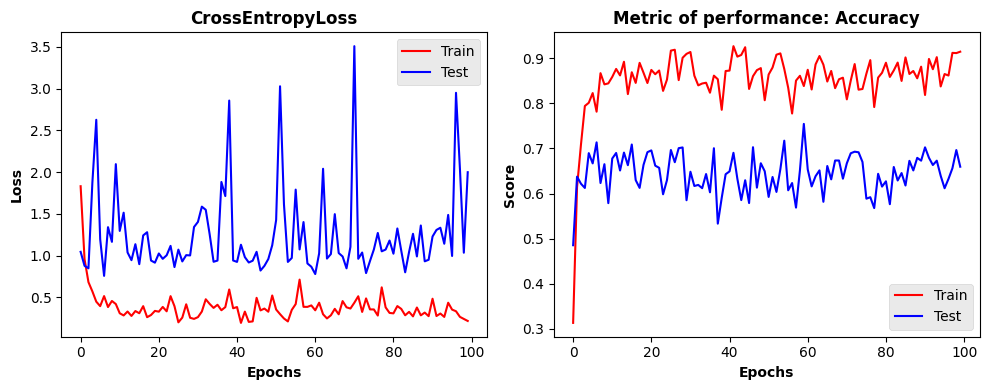

In [52]:
plot_loss_metric_curve(MODEL_RESULTS)

In [58]:
# We load the best model.
path_checkpoint = "/content/best_model.pt"
!pip install --upgrade torch
!ls {path_checkpoint}
#checkpoint = torch.load(path_checkpoint, map_location=torch.device('cpu'))
checkpoint = torch.load(path_checkpoint)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 44.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 60.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.8/209.8 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

/content/best_model.pt


In [56]:
# The best model gave us:

print(f'Best test loss = {checkpoint["loss"]}')
print(f'Epoch = {checkpoint["epoch"]+1}')

NameError: name 'checkpoint' is not defined

**Predictions**

In [ ]:
model.to(device)
model.load_state_dict(checkpoint["model"])

model.eval()
with torch.inference_mode():
    y_pred_logits_train = model(X_train_torch.to(device))
    y_pred_logits_test = model(X_test_torch.to(device))

In [ ]:
y_pred_prob_train = torch.softmax(y_pred_logits_train, dim = 1).cpu()
y_pred_class_train = torch.argmax(y_pred_prob_train, dim = 1).numpy().astype(int)

y_pred_prob_test = torch.softmax(y_pred_logits_test, dim = 1).cpu()
y_pred_class_test = torch.argmax(y_pred_prob_test, dim = 1).numpy().astype(int)

# **6. Metrics**

**Confusion Matrix**

In [ ]:
cf_mx_train = confusion_matrix(y_train_array.astype(int), y_pred_class_train)
cf_mx_test = confusion_matrix(y_test_array.astype(int), y_pred_class_test)

In [ ]:
# Confusion Matrix Plot
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,8))
ax = ax.flat
sns.heatmap(cf_mx_train,
            cmap = 'Blues',
            annot = True,
            fmt = ' ',
            annot_kws = {"fontsize":10,
                         "fontweight":"bold"},
            linewidths = 1,
            linecolor = "white",
            cbar = False,
            square = True,
            xticklabels = classes,
            yticklabels = classes,
            ax = ax[0])
ax[0].set_title('Confusion Matrix Train', fontsize = 12, fontweight = 'bold', color = 'black')

sns.heatmap(cf_mx_test,
            cmap = 'Reds',
            annot = True,
            fmt = ' ',
            annot_kws = {"fontsize":10,
                         "fontweight":"bold"},
            linewidths = 1,
            linecolor = "white",
            cbar = False,
            square = True,
            xticklabels = classes,
            yticklabels = classes,
            ax = ax[1])
ax[1].set_title('Confusion Matrix Test', fontsize = 12, fontweight = 'bold', color = 'black')

fig.tight_layout()
fig.show()

**Accuray score**

In [ ]:
print(f'Accuracy train = {accuracy_score(y_train_array.astype(int), y_pred_class_train)}')

print(f'Accuracy test = {accuracy_score(y_test_array.astype(int), y_pred_class_test)}')

**Classification Report**

In [ ]:
# To perform a reverse mapping, go from id to label.
id2label = dict(zip(range(0,7),classes))
id2label

In [ ]:
print("=="*40)
print(" " * 25, "Classification Report Train")
print("=="*40)
print(classification_report(pd.Series(y_train_array).map(id2label),
                            pd.Series(y_pred_class_train).map(id2label),))

print("=="*40)
print(" " * 25, "Classification Report Test")
print("=="*40)
print(classification_report(pd.Series(y_test_array).map(id2label),
                            pd.Series(y_pred_class_test).map(id2label)))